In [5]:
# Working on this - Diego #

In [6]:
import os
import re 
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib as plt
import seaborn as sns

<jemalloc>: MADV_DONTNEED does not work (memset will be used instead)
<jemalloc>: (This is the expected behaviour if you are running under QEMU)


In [7]:
# Downloaded listings.csv from Inside AirBNB on Saturday, December 24th #
df = pd.read_csv('listingsdec24.csv')

In [8]:
df1 = pd.read_csv('neighbourhoods.csv')

In [9]:
print(df.columns.values)

['id' 'name' 'host_id' 'host_name' 'neighbourhood_group' 'neighbourhood'
 'latitude' 'longitude' 'room_type' 'price' 'minimum_nights'
 'number_of_reviews' 'last_review' 'reviews_per_month'
 'calculated_host_listings_count' 'availability_365'
 'number_of_reviews_ltm' 'license']


In [10]:
df.describe

<bound method NDFrame.describe of                        id                                          name  \
0                  106332              Lovely large room, Bethnal Green   
1                   13913           Holiday London DB Room Let-on going   
2                  284532           COSY STUDIO-FLAT WITH A GREAT  VIEW   
3                  107048          A Luxury Studio Suite in Clerkenwell   
4                  284603           Notting Hill church stay in Heaven!   
...                   ...                                           ...   
69346             9671724            Cozy room in Greenwich, river view   
69347            20277958                        River view Tate Modern   
69348            20512703  Luxury 4 bed house, 100m to river and palace   
69349            49698549                       Waterfront Hampton Stay   
69350  554172169432589107  GuestReady Gorgeous Bright 2 Br Apartment in   

         host_id       host_name  neighbourhood_group           n

In [11]:
to_drop = ['license']
df.drop(to_drop, inplace=True, axis = 1)

In [12]:
df.head

<bound method NDFrame.head of                        id                                          name  \
0                  106332              Lovely large room, Bethnal Green   
1                   13913           Holiday London DB Room Let-on going   
2                  284532           COSY STUDIO-FLAT WITH A GREAT  VIEW   
3                  107048          A Luxury Studio Suite in Clerkenwell   
4                  284603           Notting Hill church stay in Heaven!   
...                   ...                                           ...   
69346             9671724            Cozy room in Greenwich, river view   
69347            20277958                        River view Tate Modern   
69348            20512703  Luxury 4 bed house, 100m to river and palace   
69349            49698549                       Waterfront Hampton Stay   
69350  554172169432589107  GuestReady Gorgeous Bright 2 Br Apartment in   

         host_id       host_name  neighbourhood_group           neigh

In [13]:
to_drop1 = ['neighbourhood_group']
df.drop(to_drop1, inplace=True, axis = 1)

In [14]:
df.head

<bound method NDFrame.head of                        id                                          name  \
0                  106332              Lovely large room, Bethnal Green   
1                   13913           Holiday London DB Room Let-on going   
2                  284532           COSY STUDIO-FLAT WITH A GREAT  VIEW   
3                  107048          A Luxury Studio Suite in Clerkenwell   
4                  284603           Notting Hill church stay in Heaven!   
...                   ...                                           ...   
69346             9671724            Cozy room in Greenwich, river view   
69347            20277958                        River view Tate Modern   
69348            20512703  Luxury 4 bed house, 100m to river and palace   
69349            49698549                       Waterfront Hampton Stay   
69350  554172169432589107  GuestReady Gorgeous Bright 2 Br Apartment in   

         host_id       host_name           neighbourhood  latitude  l

In [15]:
dfchlc = df["calculated_host_listings_count"].mean()
print(dfchlc)

11.987498377817191


In [16]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69351 entries, 0 to 69350
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              69351 non-null  int64  
 1   name                            69330 non-null  object 
 2   host_id                         69351 non-null  int64  
 3   host_name                       69346 non-null  object 
 4   neighbourhood                   69351 non-null  object 
 5   latitude                        69351 non-null  float64
 6   longitude                       69351 non-null  float64
 7   room_type                       69351 non-null  object 
 8   price                           69351 non-null  int64  
 9   minimum_nights                  69351 non-null  int64  
 10  number_of_reviews               69351 non-null  int64  
 11  last_review                     52571 non-null  object 
 12  reviews_per_month               

In [17]:
print(df.columns.to_list())

['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']


In [18]:
cols = ['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'calculated_host_listings_count', 'availability_365']  

In [19]:
df.sample(3)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
32905,32255989,Beautiful Garden Flat in Notting Hill,20001519,VanZyl,Kensington and Chelsea,51.51017,-0.19519,Entire home/apt,419,1,54,2022-08-13,1.24,50,289,28
45909,46194078,✪80s RETRO | 1 Bedroom Apart | Business Travel...,345144602,SynthAccommodation,Tower Hamlets,51.50106,-0.02501,Entire home/apt,132,5,46,2022-07-31,2.54,42,159,31
39363,39028355,Great vibe in great location - 2 mins from tube,16126389,Tricia,Wandsworth,51.44646,-0.20427,Entire home/apt,300,3,12,2022-06-14,0.37,2,0,6


In [20]:
chlc_htl = df.sort_values(by = 'calculated_host_listings_count', ascending=False)

In [21]:
print(chlc_htl, df.sample(3))

             id                                               name    host_id  \
26578  25243154        NEW Cosy 2BD Flat in the Heart of Wimbledon   28820321   
30707  29654010  NEW Fantastic Modern 1 Bedroom Flat Holloway Road   28820321   
48880  50407371    NEW 1 Bedroom Flat in the Heart of East London!   28820321   
40465  40233166     NEW 2BD East London Garden Flat South Woodford   28820321   
19009  19487983     New Exclusive Two Bedroom Flat Centre Chelsea!   28820321   
...         ...                                                ...        ...   
26506  25154667   Stunning Double Room near City & Regent's Canal.    4093276   
26507  25310847              Beautiful 3 Bed House- Fulham, London  191172845   
26508  25155551    Private double bedroom and bathroom, Wandsworth   14390361   
26511  25218668                                       Family House  190546055   
34675  34172940                            Double room in Shadwell  210738176   

       host_name           

In [22]:
df.head

<bound method NDFrame.head of                        id                                          name  \
0                  106332              Lovely large room, Bethnal Green   
1                   13913           Holiday London DB Room Let-on going   
2                  284532           COSY STUDIO-FLAT WITH A GREAT  VIEW   
3                  107048          A Luxury Studio Suite in Clerkenwell   
4                  284603           Notting Hill church stay in Heaven!   
...                   ...                                           ...   
69346             9671724            Cozy room in Greenwich, river view   
69347            20277958                        River view Tate Modern   
69348            20512703  Luxury 4 bed house, 100m to river and palace   
69349            49698549                       Waterfront Hampton Stay   
69350  554172169432589107  GuestReady Gorgeous Bright 2 Br Apartment in   

         host_id       host_name           neighbourhood  latitude  l

In [23]:
df.sample.chlc_htl

AttributeError: 'function' object has no attribute 'chlc_htl'

In [24]:
print(chlc_htl)

             id                                               name    host_id  \
26578  25243154        NEW Cosy 2BD Flat in the Heart of Wimbledon   28820321   
30707  29654010  NEW Fantastic Modern 1 Bedroom Flat Holloway Road   28820321   
48880  50407371    NEW 1 Bedroom Flat in the Heart of East London!   28820321   
40465  40233166     NEW 2BD East London Garden Flat South Woodford   28820321   
19009  19487983     New Exclusive Two Bedroom Flat Centre Chelsea!   28820321   
...         ...                                                ...        ...   
26506  25154667   Stunning Double Room near City & Regent's Canal.    4093276   
26507  25310847              Beautiful 3 Bed House- Fulham, London  191172845   
26508  25155551    Private double bedroom and bathroom, Wandsworth   14390361   
26511  25218668                                       Family House  190546055   
34675  34172940                            Double room in Shadwell  210738176   

       host_name           

In [25]:
print (df1.columns.values)

['neighbourhood_group' 'neighbourhood']


In [26]:
df1.sample(3)

,neighbourhood_group,neighbourhood
25,NaN,Redbridge
1,NaN,Barnet
10,NaN,Greenwich


In [27]:
df2 = pd.read_csv('lsoa-data-old-boundaries.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'lsoa-data-old-boundaries.csv'

In [30]:
df2.sample(3)

NameError: name 'df2' is not defined

<AxesSubplot:>

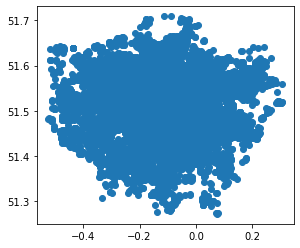

In [31]:
gdf = gpd.GeoDataFrame(df,
            geometry = gpd.points_from_xy(
                        df['longitude'], 
                        df['latitude'], 
                        crs='epsg:4326'
            )
      )
gdf.plot()

<AxesSubplot:>

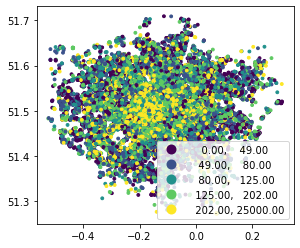

In [32]:
gdf.plot(column='price', cmap='viridis', 
         scheme='quantiles', markersize=8, legend=True)

In [33]:
# Trying to do Herfindahl_Hirschmann Index to see how some hosts might hold larger shares of the market
def hhi(series):
    _, cnt = np.unique(series, return_counts=True)
    return np.square(cnt/cnt.sum()).sum()    

new_df = df.groupby('host_name').agg({'host_id': 'count', 'calculated_host_listings_count': hhi})
print(new_df)

                          host_id  calculated_host_listings_count
host_name                                                        
'Cassie                         1                        1.000000
'Connor                         2                        1.000000
'Damz                           1                        1.000000
(Email hidden by Airbnb)       14                        0.755102
(Please                         1                        1.000000
...                           ...                             ...
英杰                              1                        1.000000
认证手机用户5528                      1                        1.000000
鏵萱                              1                        1.000000
霞                               1                        1.000000
현석                              1                        1.000000

[13043 rows x 2 columns]


In [34]:
new_df.sample(10)
# Don't think I'm doing this correctly

,host_id,calculated_host_listings_count
host_name,,
Abhishake,2,1.000000
Berrin,1,1.000000
Elisse,1,1.000000
Stan,7,0.591837
Xhorxhina,20,1.000000
Felicity,12,0.722222
Pamela,23,0.455577
François,3,1.000000
Ghaida,1,1.000000


In [35]:
# Going to try to get shares doing calculated_host_listings divided by total count


In [36]:
#testing ethnic group dataset

In [37]:
df3 = pd.read_csv('ethnic-groups-by-borough-cleaned.csv')

In [38]:
df3.head(4)

,Code,Area 2020,Number,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Area 2019,Number.1,Unnamed: 9,...,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Area 2012,Number.8,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54
0,NaN,NaN,White,Asian,Black,Mixed/ Other,Total,NaN,White,Asian,...,Asian,Black,Mixed/ Other,Total,NaN,White,Asian,Black,Mixed/ Other,Total
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E09000001,City of London,-,-,-,-,-,City of London,"12,000",-,...,-,-,-,-,City of London,-,-,-,-,-
3,E09000002,Barking and Dagenham,"99,000","55,000","51,000","16,000","222,000",Barking and Dagenham,"108,000","43,000",...,"32,000","43,000","12,000","193,000",Barking and Dagenham,"106,000","27,000","44,000","12,000","189,000"
